In [1]:
from molmap.feature.fingerprint import Extraction as fext
from molmap.feature.descriptor import Extraction as dext

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Descriptors variance distribution

In [135]:
#load summary info.
info = dext().scaleinfo
df = dext().bitsinfo
df = df.set_index('IDs')

In [136]:
df = df[['Subtypes']].join(info['var'])
df['var'] = df['var'] .apply(lambda x:1000 if x > 1000 else x)
df['Log10 Variance'] = np.log10(df['var'] + 1e-05)
#df['Log Varience']  = df['var'] .apply(lambda x:1000 if x > 1000 else x)

In [137]:
seq_lst = df.groupby('Subtypes')['var'].apply(np.median).sort_values().index.tolist()

/home/shenwanxiang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


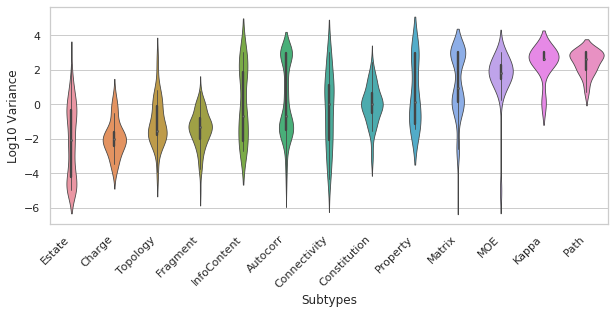

In [138]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
ax = sns.violinplot(x="Subtypes", y="Log10 Variance", data=df, order = seq_lst,linewidth = 0.8)
_ = ax.set_xticklabels(
                    ax.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
ax.figure.savefig('./d_var_distribution.pdf', bbox_inches="tight")

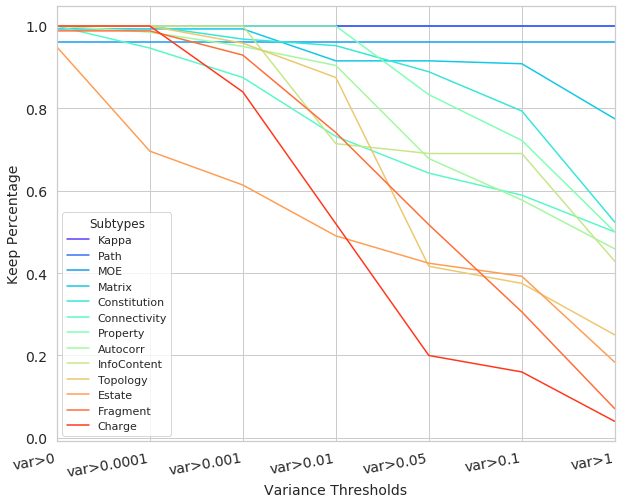

In [139]:
total = df.groupby('Subtypes')['var'].count()
VarianceThresholds = [0, 1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 1]

cont = []
selected = []
for vt in VarianceThresholds:
    df1 = df[df['var'] > vt]
    s1 = df1.groupby('Subtypes')['var'].count()
    selected.append(s1.to_frame(name = 'var>%s' % vt))
    
    s1 = s1/total
    s1 = s1.to_frame(name = 'var>%s' % vt)
    cont.append(s1)

df_keep_percentage = pd.concat(cont, axis=1)
df_keep_percentage = df_keep_percentage.sort_values(['var>1'], ascending=False)
colors = sns.color_palette("rainbow", len(df_keep_percentage)).as_hex()
ax = df_keep_percentage.T.plot(figsize=(10,8), color = colors, fontsize = 14, )
ax.set_xticklabels(
                    ax.get_xticklabels(), 
                    rotation=10, 
                    horizontalalignment='right')

ax.set_xlabel('Variance Thresholds', fontsize = 14)
ax.set_ylabel('Keep Percentage', fontsize = 14)

plt.savefig('./d_var_thresholds.pdf', bbox_inches="tight")


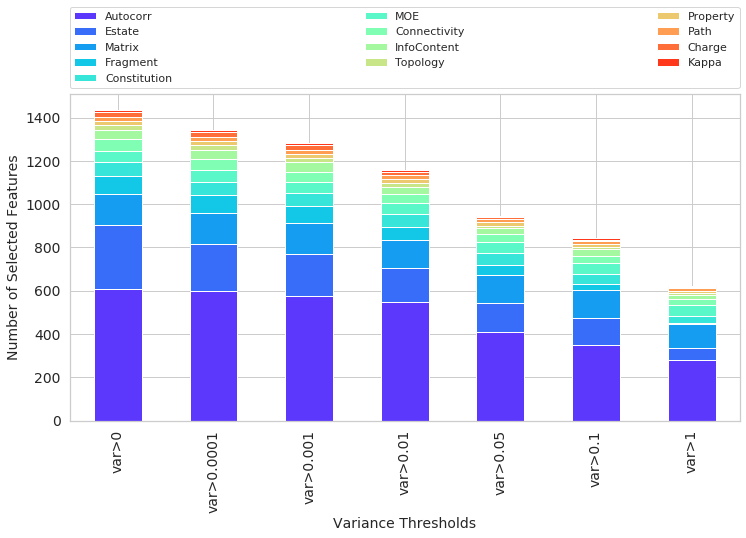

In [140]:
dfd = pd.concat(selected, axis=1).T[df_keep_percentage.index]
dfd = pd.concat(selected, axis=1).T
didx = dfd.iloc[3].sort_values(ascending=False).index

dfd = dfd[didx]
ax = dfd.plot(kind= 'bar', stacked=True, figsize=(12,6),color = colors, fontsize = 14,)

ax.set_xlabel('Variance Thresholds', fontsize = 14)
ax.set_ylabel('Number of Selected Features', fontsize = 14)
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
plt.savefig('./d_var_thr_selected.pdf', bbox_inches="tight")

# Fingerprints variance distribution

In [141]:
#load summary info.
info = fext().scaleinfo
df = fext().bitsinfo
df = df.set_index('IDs')

In [142]:
df = df[['Subtypes']].join(info['var'])
df['Variance'] = df['var'].apply(lambda x:1 if x > 1 else x)

In [143]:
seq_lst = df.groupby('Subtypes')['var'].apply(np.mean).sort_values().index.tolist()

/home/shenwanxiang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


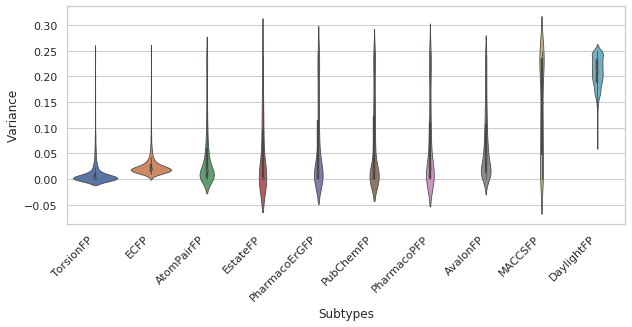

In [144]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
ax = sns.violinplot(x="Subtypes", y="Variance", data=df, order = seq_lst,linewidth = 0.8,  )
_ = ax.set_xticklabels(
                    ax.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
ax.figure.savefig('./f_var_distribution.pdf', bbox_inches="tight")

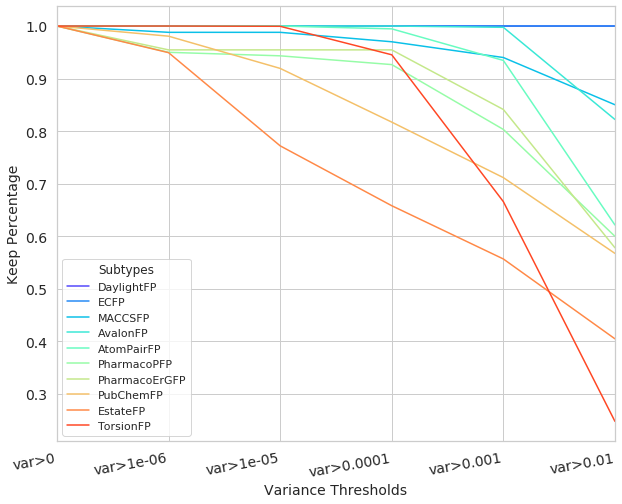

In [145]:
total = df.groupby('Subtypes')['var'].count()
VarianceThresholds = [0,1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

cont = []
selected = []
for vt in VarianceThresholds:
    df1 = df[df['var'] > vt]
    s1 = df1.groupby('Subtypes')['var'].count()
    selected.append(s1.to_frame(name = 'var>%s' % vt))
    s1 = s1/total
    s1 = s1.to_frame(name = 'var>%s' % vt)
    cont.append(s1)
    
df_keep_percentage = pd.concat(cont, axis=1)
df_keep_percentage = df_keep_percentage.sort_values(['var>0.01'], ascending=False)
colors = sns.color_palette("rainbow", len(df_keep_percentage)).as_hex()
ax = df_keep_percentage.T.plot(figsize=(10,8), color = colors, fontsize = 14, )
ax.set_xticklabels(
                    ax.get_xticklabels(), 
                    rotation=10, 
                    horizontalalignment='right')

ax.set_xlabel('Variance Thresholds', fontsize = 14)
ax.set_ylabel('Keep Percentage', fontsize = 14)

plt.savefig('./f_var_thresholds.pdf', bbox_inches="tight")


### We can see that TorsionFP and EstateFP are pretty sparse

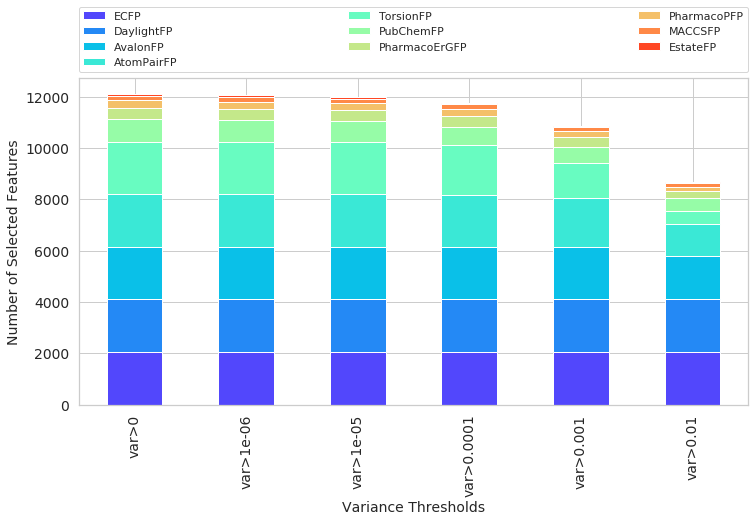

In [146]:
dfd = pd.concat(selected, axis=1).T[df_keep_percentage.index]
dfd = pd.concat(selected, axis=1).T
didx = dfd.iloc[3].sort_values(ascending=False).index

dfd = dfd[didx]
ax = dfd.plot(kind= 'bar', stacked=True, figsize=(12,6),color = colors, fontsize = 14,)

ax.set_xlabel('Variance Thresholds', fontsize = 14)
ax.set_ylabel('Number of Selected Features', fontsize = 14)
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
plt.savefig('./f_var_thr_selected.pdf', bbox_inches="tight")